### Search terms used in pubmed "novel coronavirus or covid-19 or coronavirus disease-2019". 

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import re
import requests
from urllib.request import Request, urlopen
pd.options.display.max_rows = 15000
pd.options.display.max_columns = 15000
%matplotlib inline

In [22]:
covid19 = pd.read_csv('../data/output/covid19_final.csv', sep = ",")
impact_factor = pd.read_csv('../data/JournalHomeGrid.csv', header = 1)
impact_factor.columns = ['Rank', 'journal_title', 'total_cites', 'impact_factor',
       'eigenfactor_score']

In [23]:
covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36541 entries, 0 to 36540
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   PMID                 36541 non-null  int64 
 1   Title                36423 non-null  object
 2   ISOAbbreviation      36490 non-null  object
 3   journal_title        36541 non-null  object
 4   Abstract             20069 non-null  object
 5   Journalinfo_country  36540 non-null  object
 6   Published_year       36541 non-null  int64 
 7   Keyword_list         16696 non-null  object
 8   publication_type     36541 non-null  object
 9   medline_citation     36541 non-null  object
 10  pubmed_year          36541 non-null  int64 
 11  Affiliation          34151 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.3+ MB


In [24]:
impact_factor['journal_title'] = impact_factor.journal_title.str.lower()
#impact_factor[impact_factor.journal_title.str.contains('sensors', na= False)]
covid19.journal_title = covid19.journal_title.str.lower()
#covid19['journal_title'] = covid19['journal_title'].str.replace('(\s\:.*$)',"") # removes : in journal titile
#covid19.journal_title = covid19.journal_title.str.replace("(\(.*\))", '').str.strip()

In [25]:
covid19['Published_year'] = pd.to_numeric(covid19['Published_year'])
covid19.publication_type = covid19.publication_type.str.replace('Journal Article,', "", regex = True)
covid19.publication_type = covid19.publication_type.str.replace(',Journal Article', "", regex = True)

In [26]:
covid19['journal_title'] = covid19['journal_title'].str.title()
impact_factor['journal_title'] = impact_factor['journal_title'].str.title()

In [27]:
# merge dataframes
covid19 = covid19.merge(impact_factor, left_on = 'journal_title', right_on = 'journal_title', how = 'left')

In [28]:
covid19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38103 entries, 0 to 38102
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PMID                 38103 non-null  int64  
 1   Title                37985 non-null  object 
 2   ISOAbbreviation      38052 non-null  object 
 3   journal_title        38103 non-null  object 
 4   Abstract             20932 non-null  object 
 5   Journalinfo_country  38102 non-null  object 
 6   Published_year       38103 non-null  int64  
 7   Keyword_list         17520 non-null  object 
 8   publication_type     38103 non-null  object 
 9   medline_citation     38103 non-null  object 
 10  pubmed_year          38103 non-null  int64  
 11  Affiliation          35652 non-null  object 
 12  Rank                 19280 non-null  object 
 13  total_cites          19280 non-null  object 
 14  impact_factor        19280 non-null  object 
 15  eigenfactor_score    19280 non-null 

In [29]:
covid19.head()

,PMID,Title,ISOAbbreviation,journal_title,Abstract,Journalinfo_country,Published_year,Keyword_list,publication_type,medline_citation,pubmed_year,Affiliation,Rank,total_cites,impact_factor,eigenfactor_score
0,32702757,Different Hypercoagulable Profiles in Patients...,Thromb. Haemost.,Thrombosis And Haemostasis,NaN,Germany,2020,NaN,Journal Article,Publisher,2020,"Anaesthesia and Intensive Care Unit, Padua Uni...",1132,"16,590",4.733,0.02281
1,32702752,Advocacy during crisis: Maintaining a legislat...,Am J Health Syst Pharm,American Journal Of Health-System Pharmacy : A...,In an effort to expedite the publication of ar...,England,2020,"COVID-19,advocacy,grassroots,legislative visit...",Journal Article,Publisher,2020,"Department of Pharmacy, NewYork-Presbyterian H...",NaN,NaN,NaN,NaN
2,32702751,Ketoacidosis in Children and Adolescents With ...,JAMA,Jama,NaN,United States,2020,NaN,Journal Article,Publisher,2020,"Center of Child and Adolescent Medicine, Justu...",NaN,NaN,NaN,NaN
3,32702738,Genetic correlates of psychological responses ...,Res Sq,Research Square,We investigated how the COVID-19 crisis and th...,United States,2020,NaN,Preprint,PubMed-not-MEDLINE,2020,NaN,NaN,NaN,NaN,NaN
4,32702737,B cell clonal expansion and convergent antibod...,Res Sq,Research Square,During virus infection B cells are critical fo...,United States,2020,"B cells,SARS-CoV-2,antigen receptors",Preprint,PubMed-not-MEDLINE,2020,"Department of Pathology, Stanford University.D...",NaN,NaN,NaN,NaN



## Analysis manuscript without review articles

In [30]:
minus_reviews =covid19[~covid19.publication_type.str.contains("Review|Comment|Editorial|Letter|Published Erratum")==True]
minus_reviews.publication_type.value_counts()

Journal Article                                                                         19979
Case Reports                                                                             1206
Preprint                                                                                  664
News                                                                                      359
English Abstract                                                                          210
Practice Guideline                                                                        163
Comparative Study                                                                         152
Observational Study                                                                       111
Multicenter Study                                                                          75
Evaluation Study                                                                           71
Personal Narrative                                          

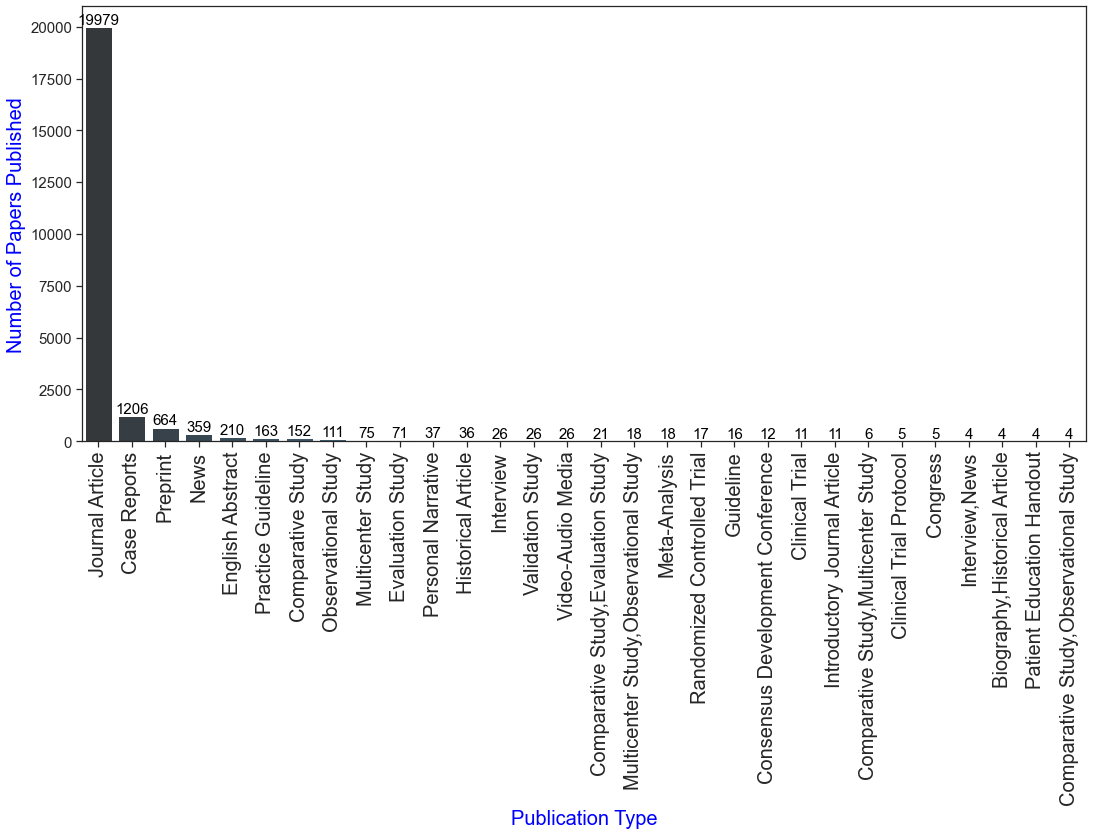

In [31]:
sns.set(rc={'figure.figsize':(18,8)}, style ='white' )
sns.set_style("ticks")
publication_type = minus_reviews.groupby('publication_type')['PMID'].count().reset_index()\
                        .sort_values('PMID', ascending =False).reset_index(drop= True).head(30)
ax =sns.barplot(x = 'publication_type', y = 'PMID', data = publication_type, palette ="Blues_d")
plt.xlabel('Publication Type',fontsize = 20, color = 'blue')
plt.ylabel('Number of Papers Published',fontsize = 20, color = 'blue')
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 15)
for index, row in publication_type.iterrows():
    ax.text(row.name,row.PMID, round(row.PMID),color='black', ha="center",fontsize = 15, va='bottom')#, clip_on= True);


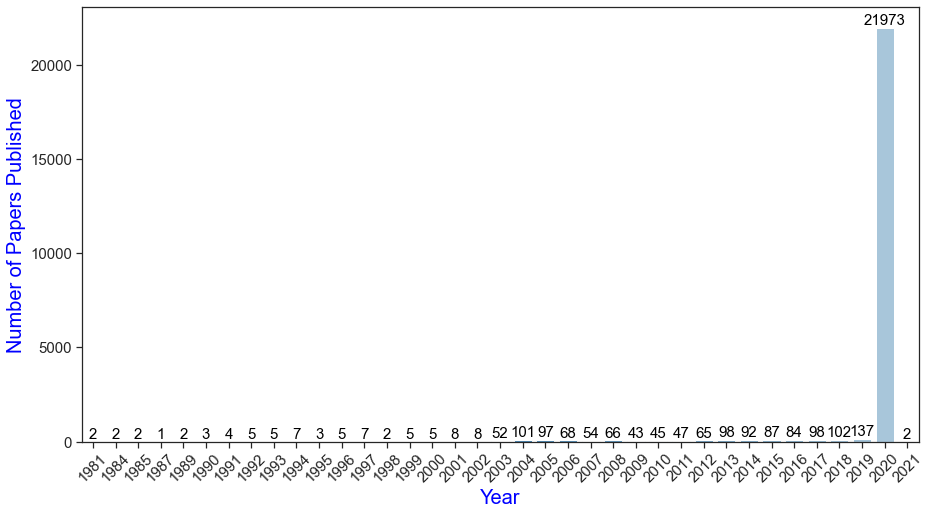

In [32]:
sns.set(rc={'figure.figsize':(15,8)}, style ='white' )
sns.set_style("ticks")
num_published_year= minus_reviews.groupby('Published_year')['PMID'].count().reset_index()\
                        .sort_values('Published_year', ascending =False)
g =sns.barplot(x = 'Published_year', y = 'PMID', data = num_published_year, palette ="Blues_d")
plt.xlabel('Year',fontsize = 20, color = 'blue')
plt.ylabel('Number of Papers Published',fontsize = 20, color = 'blue')
plt.xticks(fontsize = 15, rotation = 45)
plt.yticks(fontsize = 15)
for index, row in num_published_year.iterrows():
    g.text(row.name,row.PMID, round(row.PMID), color='black', ha="center", fontsize = 15, va='bottom')
plt.savefig("../data/numbers_per_year.png",  bbox_inches="tight")
plt.show();

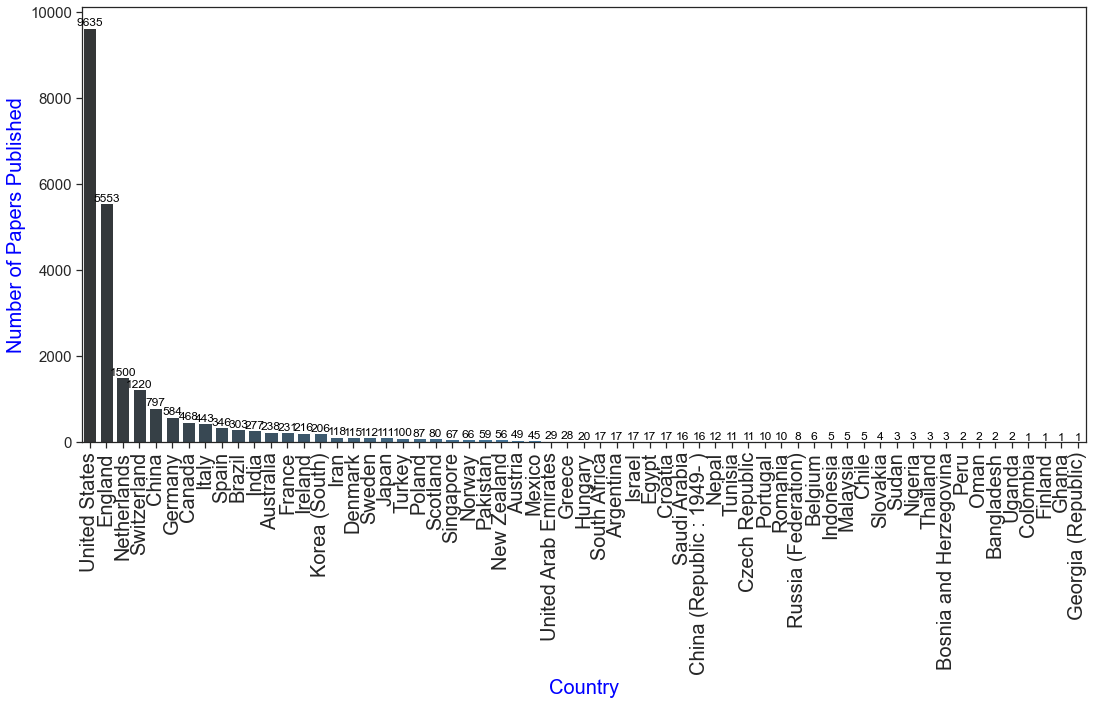

In [35]:
sns.set(rc={'figure.figsize':(18,8)}, style ='white')
sns.set_style("ticks")
num_published_country= minus_reviews.groupby('Journalinfo_country')['PMID'].count().reset_index()\
                        .sort_values('PMID', ascending =False).reset_index(drop= True)\

g =sns.barplot(x = 'Journalinfo_country', y = 'PMID', data = num_published_country, palette ="Blues_d")
plt.xlabel('Country',fontsize = 20, color = 'blue')
plt.ylabel('Number of Papers Published',fontsize = 20, color = 'blue')
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 15)
for index, row in num_published_country.iterrows():
    g.text(row.name,row.PMID, round(row.PMID), color='black', ha="center", fontsize = 12, va='bottom');

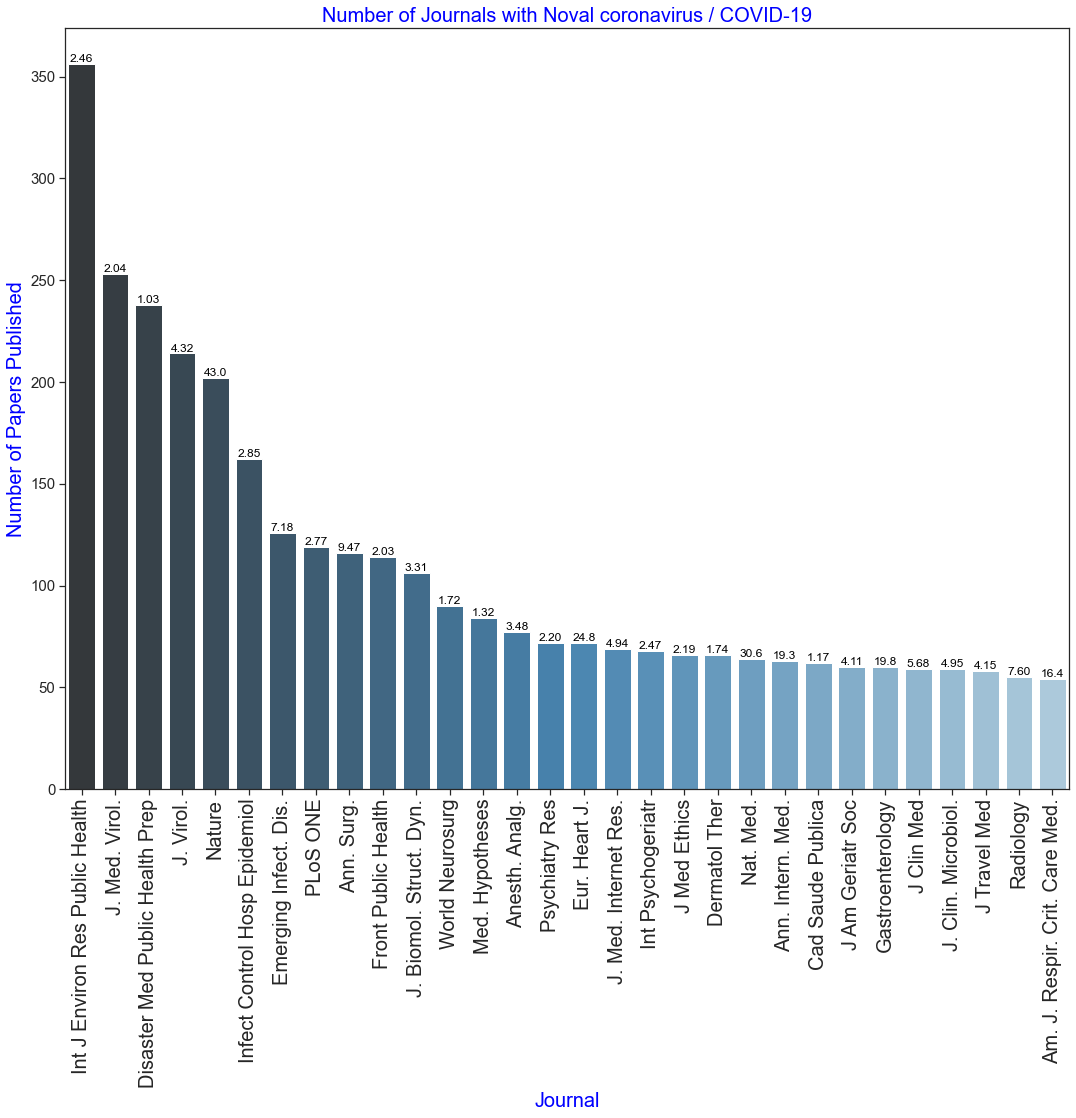

In [36]:
sns.set(rc={'figure.figsize':(18,14)}, style ='white')
sns.set_style("ticks")
total_published=  minus_reviews.groupby(['ISOAbbreviation', 'impact_factor'])[['PMID']].count()\
  .reset_index().sort_values('PMID', ascending = False).reset_index(drop= True).head(30)
g =sns.barplot(x = 'ISOAbbreviation', y = 'PMID', data = total_published, palette ="Blues_d", ci=None)
plt.xlabel('Journal',fontsize = 20, color = 'blue')
plt.ylabel('Number of Papers Published',fontsize = 20, color = 'blue')
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 15)
plt.title('Number of Journals with Noval coronavirus / COVID-19', fontsize = 20, color = 'blue')

for index, row in total_published.iterrows():
    g.text(row.name,row.PMID, str(row.impact_factor[0:4]),color='black', ha="center", fontsize = 12, va='bottom')
plt.savefig("../data/journals.png",  bbox_inches="tight")
plt.show();

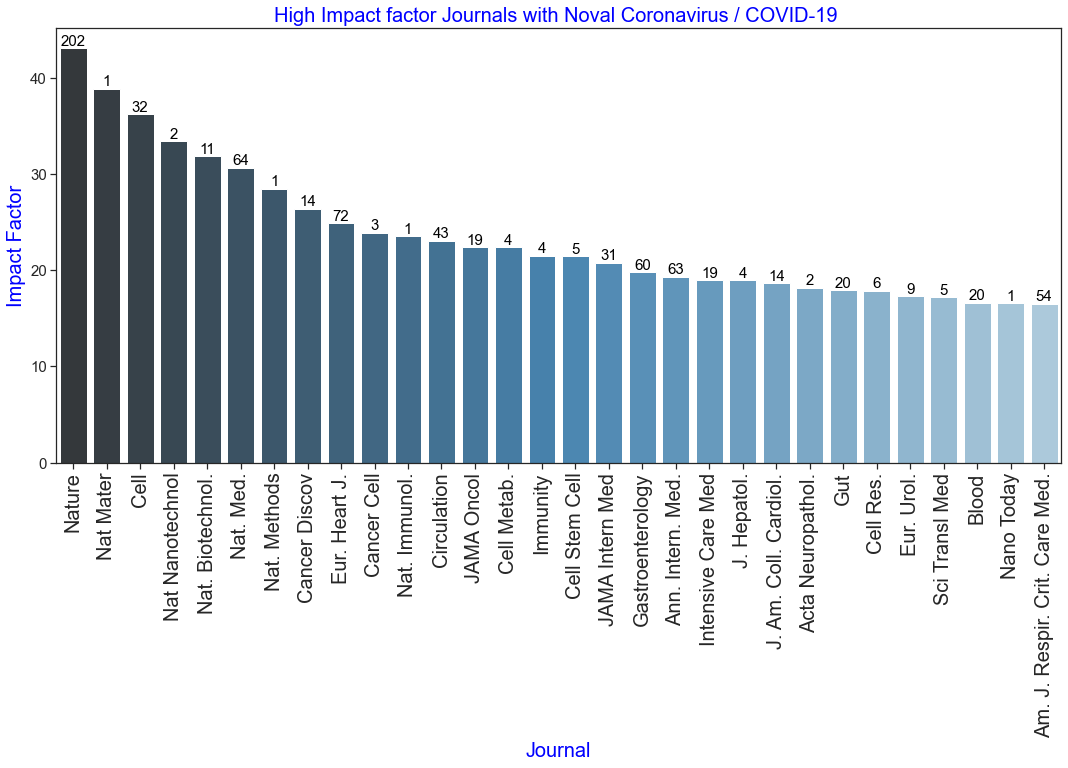

In [37]:
sns.set(rc={'figure.figsize':(18,8)}, style ='white')
sns.set_style("ticks")
highimpact_journal= minus_reviews.groupby(['ISOAbbreviation','impact_factor'])['PMID'].count()\
            .sort_values(ascending = False).reset_index()              
highimpact_journal['impact_factor']=highimpact_journal.impact_factor.str.replace('Not Available', "0.0")
highimpact_journal['impact_factor']=highimpact_journal.impact_factor.astype('float')
highimpact_journal=highimpact_journal.sort_values('impact_factor', ascending = False).reset_index()
highimpact_journal=highimpact_journal.drop('index', axis=1).head(30)
g =sns.barplot(x = 'ISOAbbreviation', y = 'impact_factor', data = highimpact_journal, palette ="Blues_d")
plt.xlabel('Journal',fontsize = 20, color = 'blue')
plt.ylabel('Impact Factor',fontsize = 20, color = 'blue')
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 15)
plt.title('High Impact factor Journals with Noval Coronavirus / COVID-19 ', fontsize = 20, color = 'blue')

for index, row in highimpact_journal.iterrows():
    g.text(row.name,row.impact_factor, round(row.PMID,1),color='black', ha="center", fontsize = 15, va='bottom')
    
plt.savefig("../data/journals_highimpact.png",  bbox_inches="tight")
plt.show();